# Import the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR

# Load the dataset

In [2]:
data=pd.read_csv('H2HBABBA1533.csv')

In [3]:
data.shape

(50000, 19)

In [4]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0
3,U001,0200769623,WAL-MAR co,2019-11-26 00:00:00,2019.0,1.930124e+09,2019-11-15,20191107,20191115,20191130.0,USD,RV,1.0,NaN,18177.18,20191115.0,NAH4,1.930124e+09,0
4,U001,0200769623,WAL-MAR,NaN,2020.0,1.930737e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,NaN,24079.57,20200403.0,NAH4,1.930737e+09,1


# Data cleaning

### Remove constants

In [5]:
data.nunique()

business_code                 6
cust_number                1412
name_customer              4250
clear_date                  397
buisness_year                 2
doc_id                    48788
posting_date                502
document_create_date        506
document_create_date.1      502
due_in_date                 546
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44166
baseline_create_date        505
cust_payment_terms           73
invoice_id                48784
isOpen                        2
dtype: int64

In [6]:
# posting_id and area_business can be droped as it contains 0 and 1 unique values

In [6]:
data.drop(columns=['posting_id','area_business'],inplace=True,axis=1)

In [7]:
# As doc_id and invoice id is unique we can drop this column
data.drop(columns=['invoice_id','doc_id'],inplace=True,axis=1)

### Checking for duplicates

In [8]:
data.duplicated().sum()

1225

In [9]:
# We can delete this duplcate values to reduce redundancy
data.drop_duplicates(keep=False,inplace=True)

In [10]:
data.duplicated().sum()#Duplcates removed

0

In [11]:
data.T.duplicated().sum() # no duplicates in columns

0

# Conversion

In [12]:
# Date time conversion
#convert To date datatype for efficient calculations
data['document_create_date'] = pd.to_datetime(data['document_create_date'],format='%Y%m%d')
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'],format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')
data['clear_date'] = pd.to_datetime(data['clear_date'])
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['due_in_date'] = pd.to_datetime(data['due_in_date'],format='%Y%m%d')

In [13]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200895843,US,2019-09-09,2019.0,2019-08-22,2019-08-22,2019-08-22,2019-09-06,USD,RV,41386.61,2019-08-22,NAA8,0
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,2019-11-12,2019-11-12,2019-11-12,2019-11-27,USD,RV,47178.82,2019-11-12,NAH4,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,2019-04-12,2019-04-11,2019-04-12,2019-04-27,USD,RV,51389.52,2019-04-12,NAH4,0
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,2019-11-15,2019-11-07,2019-11-15,2019-11-30,USD,RV,18177.18,2019-11-15,NAH4,0
4,U001,0200769623,WAL-MAR,NaT,2020.0,2020-04-03,2020-04-03,2020-04-03,2020-04-18,USD,RV,24079.57,2020-04-03,NAH4,1


In [14]:
# Convert the units from USD to CAD common scale
data[data['invoice_currency'] == 'CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
25,CA02,0140104409,LOB trust,NaT,2020.0,2020-02-29,2020-02-29,2020-02-29,2020-03-14,CAD,RV,150136.21,2020-03-04,CA10,1
36,CA02,0140104429,COSTCO co,2019-07-02,2019.0,2019-06-05,2019-06-05,2019-06-05,2019-06-24,CAD,RV,15993.34,2019-06-14,CA10,0
37,CA02,0140106408,WAL-M foundation,NaT,2020.0,2020-03-21,2020-03-21,2020-03-21,2020-03-31,CAD,RV,4878.02,2020-03-21,CA10,1
43,CA02,0140104423,METRO llc,NaT,2020.0,2020-04-20,2020-04-20,2020-04-20,2020-05-01,CAD,RV,162295.09,2020-04-21,CA10,1
60,CA02,0140104429,COSTCO systems,NaT,2020.0,2020-02-27,2020-02-27,2020-02-27,2020-03-09,CAD,RV,12383.81,2020-02-28,CA10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49907,CA02,0140105847,GORDON F corporation,2019-11-08,2019.0,2019-10-24,2019-10-24,2019-10-24,2019-11-04,CAD,RV,69364.75,2019-10-25,CA10,0
49925,CA02,0140104409,LOB systems,2019-06-10,2019.0,2019-05-24,2019-05-24,2019-05-24,2019-06-10,CAD,RV,102637.83,2019-05-31,CA10,0
49942,CA02,140106408,WAL-M associates,NaT,2020.0,2020-03-29,2020-03-29,2020-03-29,2020-04-08,CAD,RV,346.36,2020-03-29,CA10,1
49973,CA02,0140104423,METRO us,2019-06-18,2019.0,2019-06-06,2019-06-06,2019-06-06,2019-06-17,CAD,RV,136973.29,2019-06-07,CA10,0


In [15]:
#Convert to USD by multiplying the amount by 0.81 to values where currency is CAD
data['total_open_amount'] = np.where((data['invoice_currency'] == 'CAD') ,((data['total_open_amount'])*0.81),(data['total_open_amount']))
data.drop(columns='invoice_currency',inplace=True)

### Sort the values according to posting date 

In [16]:
# To prevent anomaly behaviour of model it is sorted to ensure it is trained on past data
data.sort_values('posting_date')
data.reset_index(inplace=True,drop=True)
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200895843,US,2019-09-09,2019.0,2019-08-22,2019-08-22,2019-08-22,2019-09-06,RV,41386.61,2019-08-22,NAA8,0
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,2019-11-12,2019-11-12,2019-11-12,2019-11-27,RV,47178.82,2019-11-12,NAH4,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,2019-04-12,2019-04-11,2019-04-12,2019-04-27,RV,51389.52,2019-04-12,NAH4,0
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,2019-11-15,2019-11-07,2019-11-15,2019-11-30,RV,18177.18,2019-11-15,NAH4,0
4,U001,0200769623,WAL-MAR,NaT,2020.0,2020-04-03,2020-04-03,2020-04-03,2020-04-18,RV,24079.57,2020-04-03,NAH4,1


## Split the data set 

In [17]:
main_train=data[data['clear_date'].notnull()]
main_test=data[data['clear_date'].isnull()]

In [18]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200895843,US,2019-09-09,2019.0,2019-08-22,2019-08-22,2019-08-22,2019-09-06,RV,41386.61,2019-08-22,NAA8,0
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,2019-11-12,2019-11-12,2019-11-12,2019-11-27,RV,47178.82,2019-11-12,NAH4,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,2019-04-12,2019-04-11,2019-04-12,2019-04-27,RV,51389.52,2019-04-12,NAH4,0
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,2019-11-15,2019-11-07,2019-11-15,2019-11-30,RV,18177.18,2019-11-15,NAH4,0
6,U001,0200707005,KING S foundation,2019-07-05,2019.0,2019-06-19,2019-06-18,2019-06-19,2019-07-04,RV,64532.95,2019-06-19,NAA8,0


# Data analysis

In [19]:
# Caluculate the delay {clear_date-due_date}
main_train['Delay']=main_train['clear_date']-main_train['due_in_date']

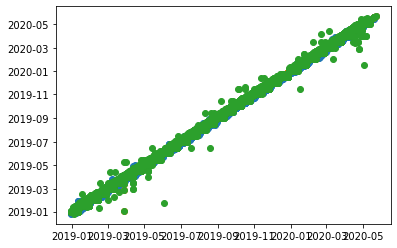

In [20]:
# Realtion between dates
plt.plot_date(data['posting_date'],data['document_create_date'])
plt.plot_date(data['posting_date'],data['document_create_date.1'])
plt.plot_date(data['posting_date'],data['baseline_create_date'])
plt.show()

In [21]:
# As these three dates depicts the same thus we drop these
# Thus as columns 'posting_date','document_create_date','document_create_date.1',
#'baseline_create_date' the dates are quite similar we can drop all except 
#'document_create_date.1' as it is formatted
main_train.drop(columns=['posting_date','document_create_date','baseline_create_date'],inplace=True,axis=1)

In [22]:
main_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,document type,total_open_amount,cust_payment_terms,isOpen,Delay
0,U001,0200895843,US,2019-09-09,2019.0,2019-08-22,2019-09-06,RV,41386.61,NAA8,0,3 days
1,U001,0200769623,WAL-MAR,2019-11-25,2019.0,2019-11-12,2019-11-27,RV,47178.82,NAH4,0,-2 days
2,U001,0200769623,WAL-MAR foundation,2019-04-23,2019.0,2019-04-12,2019-04-27,RV,51389.52,NAH4,0,-4 days
3,U001,0200769623,WAL-MAR co,2019-11-26,2019.0,2019-11-15,2019-11-30,RV,18177.18,NAH4,0,-4 days
6,U001,0200707005,KING S foundation,2019-07-05,2019.0,2019-06-19,2019-07-04,RV,64532.95,NAA8,0,1 days


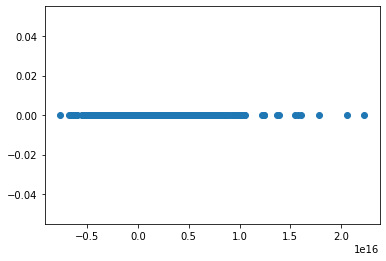

In [23]:
plt.scatter(main_train.Delay,main_train.isOpen)


In [24]:
# AS for every value delay isOpen is almost same thus it donot add any info
main_train.drop('isOpen',inplace=True,axis=1)

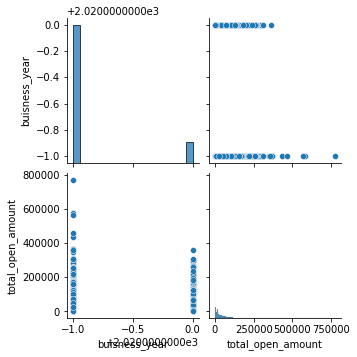

In [25]:
sns.pairplot(main_train)


### Segregating the days , months and quarter from our dates

In [26]:
# Segregating the date days , months and quater
# month_quarter,month are calculated for further use
main_train['document_create_date.1_month_quarter'] = main_train['document_create_date.1'].dt.quarter
main_train['document_create_date.1_day'] = main_train['document_create_date.1'].dt.dayofweek
main_train['document_create_date.1_month'] = main_train['document_create_date.1'].dt.month
main_train['due_in_date_month_quarter'] =main_train['due_in_date'].dt.quarter
main_train['due_in_date_month_day'] =main_train['due_in_date'].dt.dayofweek
main_train['due_in_date_month'] =main_train['due_in_date'].dt.month
# Converting delay into days
main_train['Delay'] = main_train['Delay'].dt.days

In [27]:
#clear_date,document_create_date.1,due_in_date are dropped because they are catagorical date  column and can not be passed into model for training
main_train.drop(columns=['clear_date','document_create_date.1','due_in_date'],inplace=True)

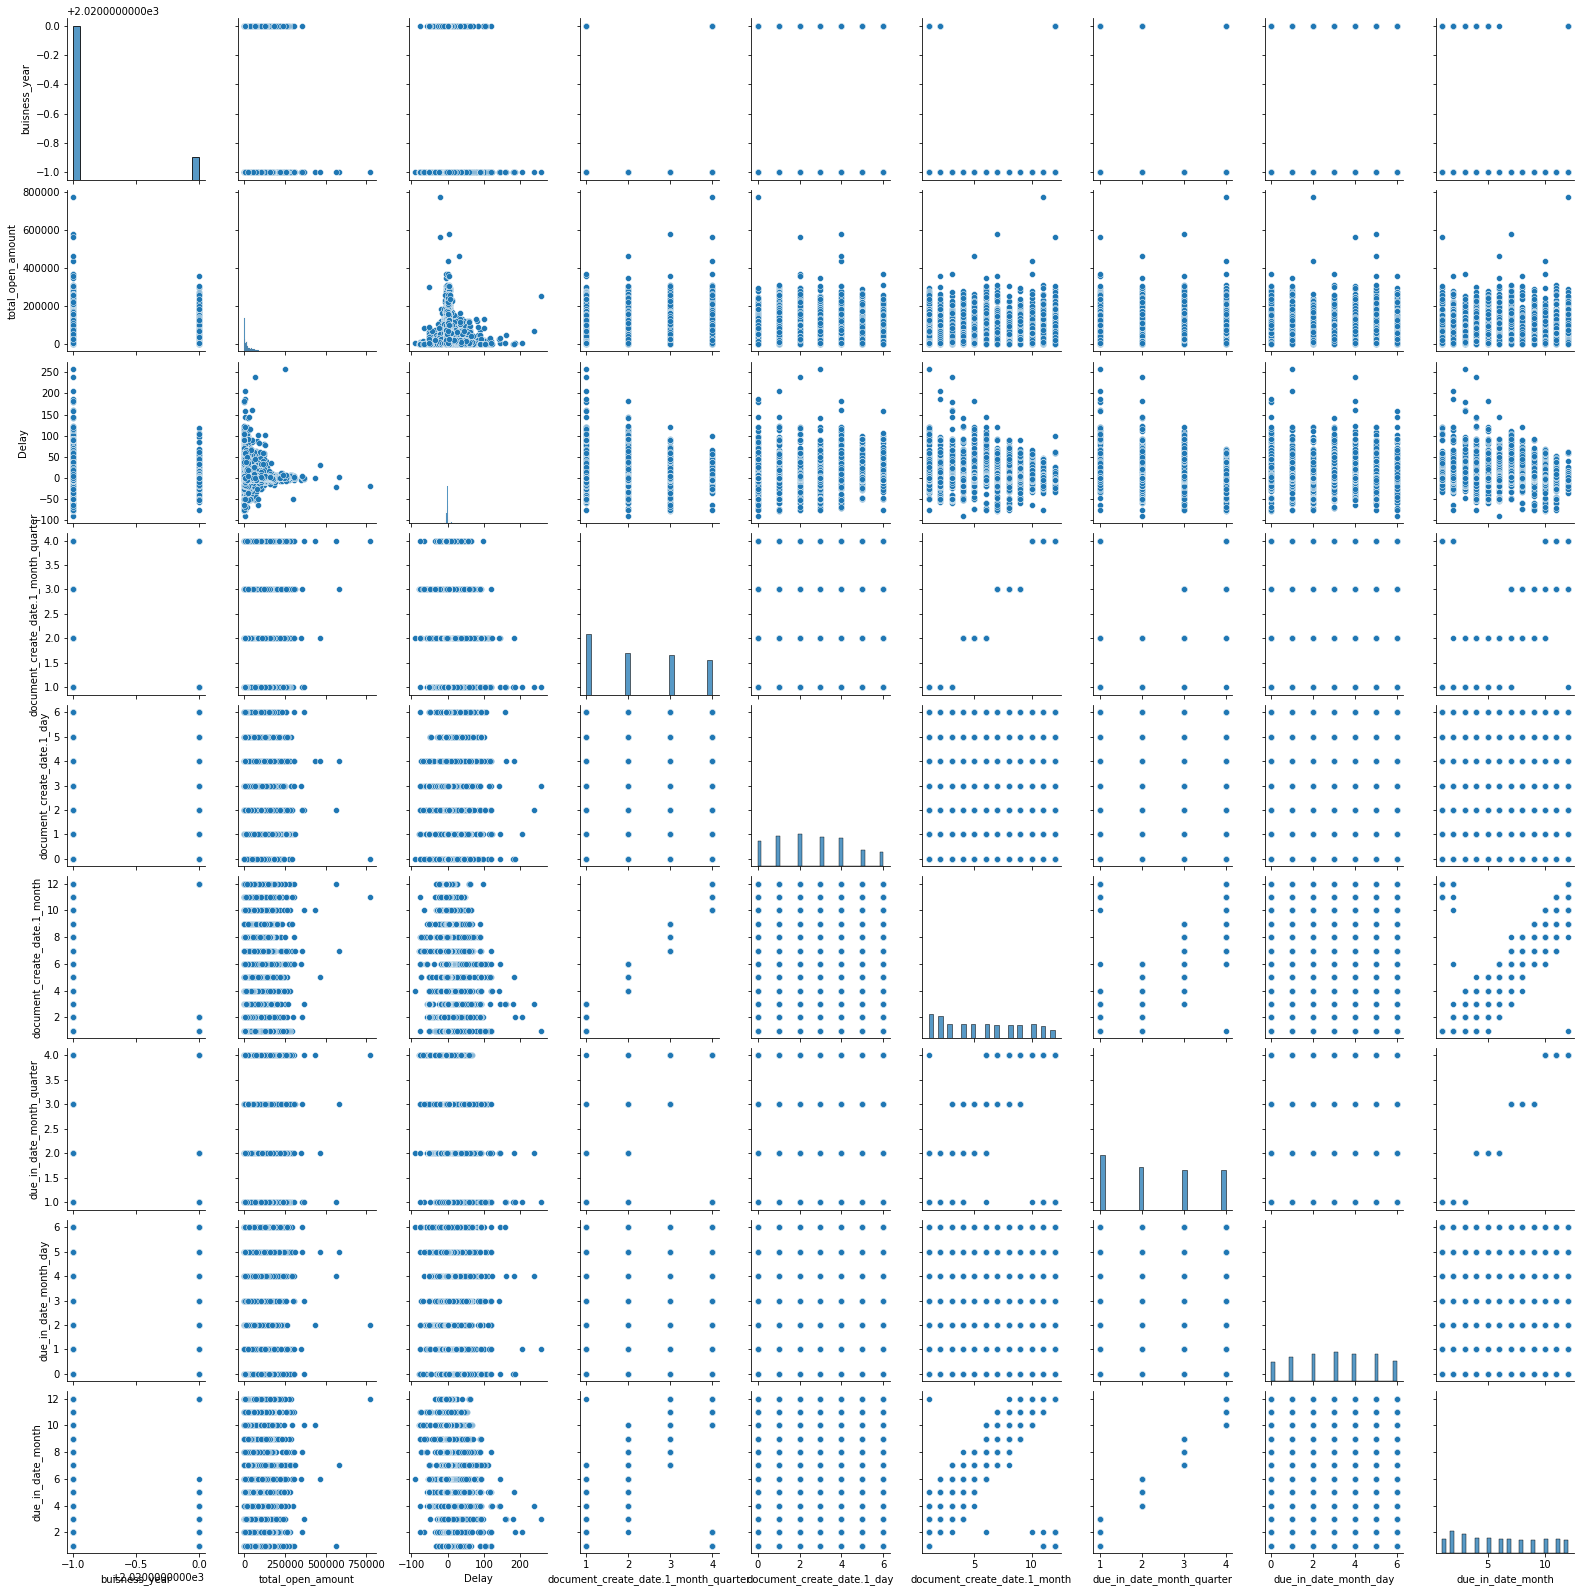

In [28]:
sns.pairplot(main_train)

In [29]:
main_train.corr()

,buisness_year,total_open_amount,Delay,document_create_date.1_month_quarter,document_create_date.1_day,document_create_date.1_month,due_in_date_month_quarter,due_in_date_month_day,due_in_date_month
buisness_year,1.000000,-0.003629,-0.014465,-0.393741,-0.008109,-0.423141,-0.454562,-0.015135,-0.459038
total_open_amount,-0.003629,1.000000,-0.002124,0.015731,0.001317,0.016577,0.010005,0.003384,0.013325
Delay,-0.014465,-0.002124,1.000000,-0.024137,0.007493,-0.025950,-0.031699,0.008378,-0.032854
document_create_date.1_month_quarter,-0.393741,0.015731,-0.024137,1.000000,-0.008960,0.973342,0.905284,-0.019902,0.902312
document_create_date.1_day,-0.008109,0.001317,0.007493,-0.008960,1.000000,0.000053,-0.000027,0.257325,0.004844
document_create_date.1_month,-0.423141,0.016577,-0.025950,0.973342,0.000053,1.000000,0.906125,-0.024362,0.918278
due_in_date_month_quarter,-0.454562,0.010005,-0.031699,0.905284,-0.000027,0.906125,1.000000,-0.009660,0.973012
due_in_date_month_day,-0.015135,0.003384,0.008378,-0.019902,0.257325,-0.024362,-0.009660,1.000000,-0.001378
due_in_date_month,-0.459038,0.013325,-0.032854,0.902312,0.004844,0.918278,0.973012,-0.001378,1.000000


### Handling the catagorical data

In [30]:
main_train.head()

,business_code,cust_number,name_customer,buisness_year,document type,total_open_amount,cust_payment_terms,Delay,document_create_date.1_month_quarter,document_create_date.1_day,document_create_date.1_month,due_in_date_month_quarter,due_in_date_month_day,due_in_date_month
0,U001,0200895843,US,2019.0,RV,41386.61,NAA8,3,3,3,8,3,4,9
1,U001,0200769623,WAL-MAR,2019.0,RV,47178.82,NAH4,-2,4,1,11,4,2,11
2,U001,0200769623,WAL-MAR foundation,2019.0,RV,51389.52,NAH4,-4,2,4,4,2,5,4
3,U001,0200769623,WAL-MAR co,2019.0,RV,18177.18,NAH4,-4,4,4,11,4,5,11
6,U001,0200707005,KING S foundation,2019.0,RV,64532.95,NAA8,1,2,2,6,3,3,7


In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
main_train.iloc[:,0] = labelencoder.fit_transform(main_train.iloc[:,0])
main_train.iloc[:,1] = labelencoder.fit_transform(main_train.iloc[:,1])
main_train.iloc[:,3] = labelencoder.fit_transform(main_train.iloc[:,2])
main_train.iloc[:,4] = labelencoder.fit_transform(main_train.iloc[:,4])
main_train.iloc[:,6] = labelencoder.fit_transform(main_train.iloc[:,6])

In [32]:
main_train.head()

,business_code,cust_number,name_customer,buisness_year,document type,total_open_amount,cust_payment_terms,Delay,document_create_date.1_month_quarter,document_create_date.1_day,document_create_date.1_month,due_in_date_month_quarter,due_in_date_month_day,due_in_date_month
0,1,958,US,3641,0,41386.61,22,3,3,3,8,3,4,9
1,1,833,WAL-MAR,3766,0,47178.82,35,-2,4,1,11,4,2,11
2,1,833,WAL-MAR foundation,3771,0,51389.52,35,-4,2,4,4,2,5,4
3,1,833,WAL-MAR co,3768,0,18177.18,35,-4,4,4,11,4,5,11
6,1,695,KING S foundation,1942,0,64532.95,22,1,2,2,6,3,3,7


In [33]:
## We can drop customer name as it is depicted by customer number
main_train.drop('name_customer',inplace=True,axis=1)

#### From corr table we can get inference that business_code , name customer,business_year,total amount all show a negetive corr

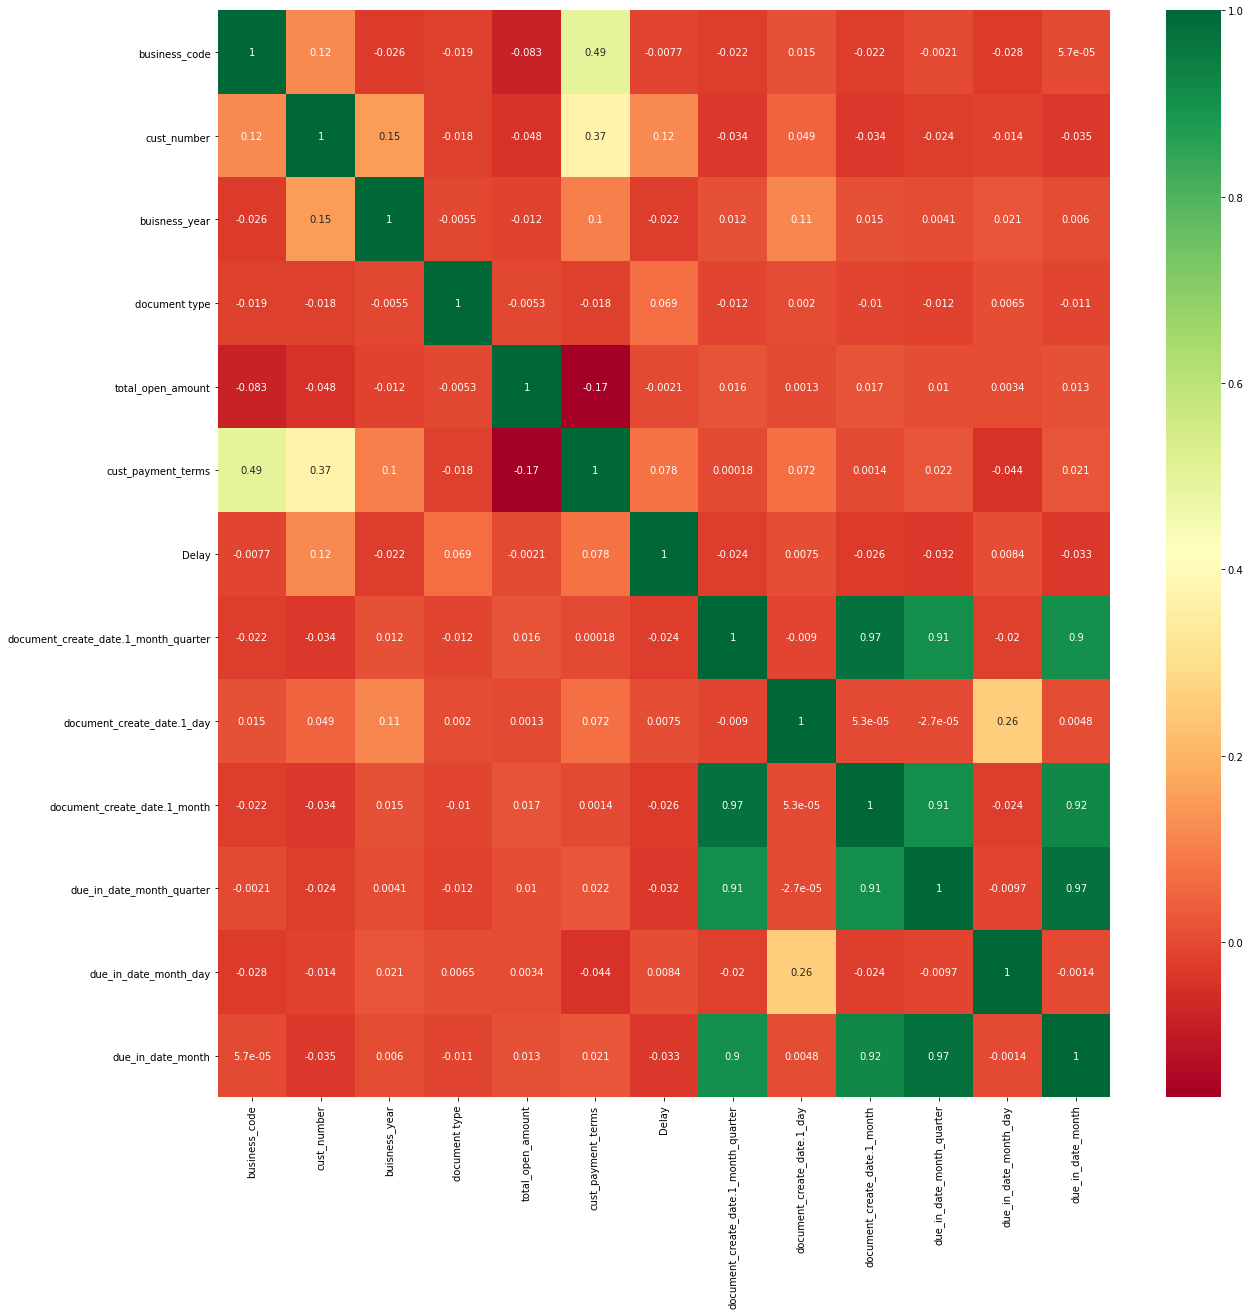

In [34]:
corrmat=main_train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(main_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Check for skew ness of data

2.4549192419779224


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

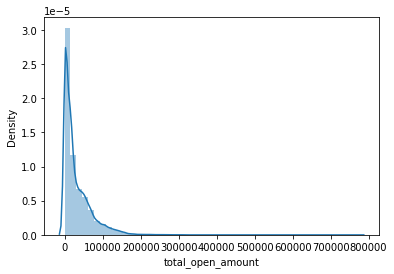

In [35]:
# Checking for skewness
print(main_train['total_open_amount'].skew())
sns.distplot(main_train['total_open_amount']) 
# here we can get inference from the plot that that this column is right skewed

#### Treament for skewness

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

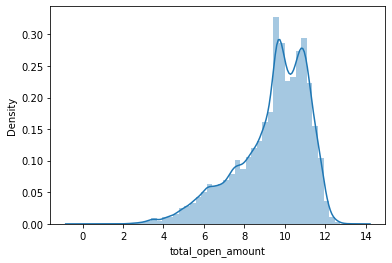

In [36]:
## Log transformation of the amount column
sns.distplot(np.log(main_train['total_open_amount']))
# We can see that the skewness is somewhat improved..

<AxesSubplot:ylabel='Density'>

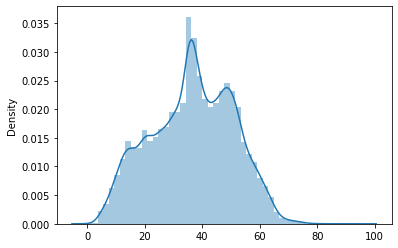

In [37]:
## Box_cox transformation
amt_trans1 = stats.boxcox(main_train['total_open_amount'])[0]
sns.distplot(amt_trans1) 
#WE can see that it nearly resulted into a gaussian curve

## Checking for outliers

### Now as per the empirical rule any absolute value of z-score above 3 is considered as an Outlier. This is quite 

### debatable and may not hold true for every dataset in this world.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'business_code'),
  Text(1, 0, 'cust_number'),
  Text(2, 0, 'buisness_year'),
  Text(3, 0, 'document type'),
  Text(4, 0, 'total_open_amount'),
  Text(5, 0, 'cust_payment_terms'),
  Text(6, 0, 'Delay'),
  Text(7, 0, 'document_create_date.1_month_quarter'),
  Text(8, 0, 'document_create_date.1_day'),
  Text(9, 0, 'document_create_date.1_month'),
  Text(10, 0, 'due_in_date_month_quarter'),
  Text(11, 0, 'due_in_date_month_day'),
  Text(12, 0, 'due_in_date_month')])

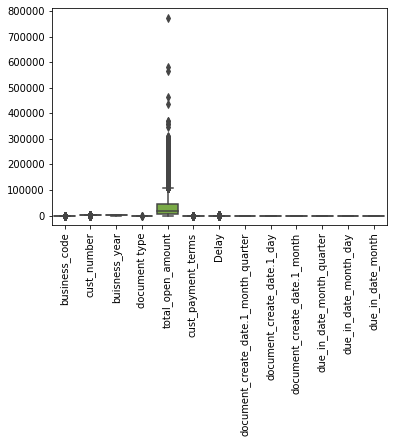

In [38]:
sns.boxplot(data=main_train)
plt.xticks(rotation=90)

(array([2.6887e+04, 7.3080e+03, 2.4710e+03, 1.0600e+03, 2.7700e+02,
        8.6000e+01, 4.5000e+01, 2.7000e+01, 2.0000e+00, 4.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([8.30000000e-01, 3.86882690e+04, 7.73757080e+04, 1.16063147e+05,
        1.54750586e+05, 1.93438025e+05, 2.32125464e+05, 2.70812903e+05,
        3.09500342e+05, 3.48187781e+05, 3.86875220e+05, 4.25562659e+05,
        4.64250098e+05, 5.02937537e+05, 5.41624976e+05, 5.80312415e+05,
        6.18999854e+05, 6.57687293e+05, 6.96374732e+05, 7.35062171e+05,
        7.73749610e+05]),
 <BarContainer object of 20 artists>)

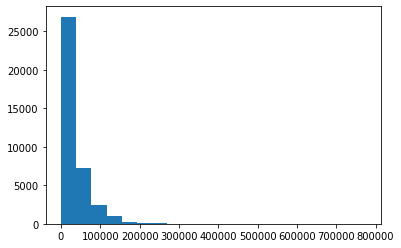

In [39]:
plt.hist(main_train['total_open_amount'], bins=20)

In [40]:
#Outlier in total_open_amount
from scipy.stats import zscore
z_scores = zscore(main_train['total_open_amount'])
abs_z_scores = np.abs(z_scores)
out=pd.DataFrame(np.where(abs_z_scores<3,'Not Outlier','Outlier'))
out.value_counts()

Not Outlier    37516
Outlier          656
dtype: int64

In [41]:
# Outlier Treatment
upper_lim=main_train['total_open_amount'].quantile(0.99) 
upper_lim

158755.2895000001

In [42]:
# Replace all the value with outside the range of upperlimit
# With the value of the upper limit to treat the outlier
main_train.loc[(main_train['total_open_amount']>upper_lim),'total_open_amount']=upper_lim # Assign the value

### Exploring columns relation with delay

In [43]:
main_train.columns

Index(['business_code', 'cust_number', 'buisness_year', 'document type',
       'total_open_amount', 'cust_payment_terms', 'Delay',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month'],
      dtype='object')

In [44]:
# To see customer wise delay practised
extract_data=main_train.groupby('cust_number')['Delay'].agg('mean')
avg_cust_delay=extract_data.to_frame()
avg_cust_delay


,Delay
cust_number,
0,-17.666667
1,-7.000000
2,-2.000000
3,-3.800000
4,4.000000
...,...
1324,99.000000
1325,7.946387
1326,7.657143


In [45]:
## Adding a new column as avg customer delay
for i in extract_data.index:
    main_train.loc[main_train.cust_number==i, "average_delayby"] =avg_cust_delay['Delay'][i]

In [46]:
## Realation between business code and delay
code_data=main_train.groupby('business_code')['Delay'].mean()
avg_delay_bycode=code_data.to_frame()
avg_delay_bycode

,Delay
business_code,
0,5.883515
1,0.365768
2,4.187970
3,11.100000
4,41.333333
5,7.286938


In [47]:
# We will create a new column based on the business code
trans = main_train.groupby('business_code')['Delay'].mean().to_dict()

In [48]:
# Mapped the dictionary with the following delay
main_train['code_Wise_delay'] = main_train['business_code'].map(trans)

### Feature selection

In [49]:
#Extracting best features to be fed to train our model
x=main_train.drop(labels=['Delay'], axis=1)
y= main_train['Delay']
model = ExtraTreesClassifier()
model.fit(x,y)

MemoryError: could not allocate 95420416 bytes

In [ ]:
selt = pd.Series(model.feature_importances_, index=x.columns)
selt.nlargest(11).plot(kind='barh')
plt.show()

<h4> Now we will split the data for training<h4>
<ul>
<li> training 80 %</li>
<li> Validation 10 %</li>
<li> Test 10 %</li>

In [50]:
# WE WILL SPPLIT TRAIN SET AS 80 % OF DATA AND VALIDATION INTERMIDEATE AS 20 %
from sklearn.model_selection import train_test_split
train_set, validation_intermediate = train_test_split(main_train,test_size=.2,shuffle=False)
train_set.shape,validation_intermediate.shape

((30537, 15), (7635, 15))

In [51]:
# Now we will split the validation intermidiate to two sets one is valdiation set and another test set

In [52]:
validation_set,test_set = train_test_split(validation_intermediate,test_size=.5,shuffle=False)
test_set.shape,validation_set.shape

((3818, 15), (3817, 15))

In [53]:
X=train_set.drop('Delay',axis=1)
y=train_set.Delay
x_val=validation_set.drop('Delay',axis=1)
y_val=validation_set.Delay
x_test=test_set.drop('Delay',axis=1)
y_test=test_set.Delay

### Normalisation before fed to model

In [54]:
x_val.columns

Index(['business_code', 'cust_number', 'buisness_year', 'document type',
       'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month', 'average_delayby',
       'code_Wise_delay'],
      dtype='object')

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X[['business_code', 'cust_number', 'buisness_year',
       'document type', 'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month']] = scaler.fit_transform(X[['business_code', 'cust_number', 'buisness_year',
       'document type', 'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month']])
x_val[['business_code', 'cust_number', 'buisness_year',
       'document type', 'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month']] = scaler.fit_transform(x_val[['business_code', 'cust_number', 'buisness_year',
       'document type', 'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month']])
x_test[['business_code', 'cust_number', 'buisness_year',
       'document type', 'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month']] = scaler.fit_transform(x_test[['business_code', 'cust_number','buisness_year',
       'document type', 'total_open_amount', 'cust_payment_terms',
       'document_create_date.1_month_quarter', 'document_create_date.1_day',
       'document_create_date.1_month', 'due_in_date_month_quarter',
       'due_in_date_month_day', 'due_in_date_month']])


### Linear Regression model

In [56]:
model_1 = LinearRegression()
model_1.fit(X,y)

LinearRegression()

### Test on validate set

In [57]:
pred_value = model_1.predict(x_val)

In [58]:
print(f'mean_squared_error = {mean_squared_error(y_val, pred_value,squared=False)}')
pd.DataFrame(zip(y_val,pred_value))
accuracy = model_1.score(x_val,y_val)
print('Accuracy of the model achived =  {}%'.format(accuracy*100,'%'))

mean_squared_error = 8.995811482757544
Accuracy of the model achived =  37.43750199044008%


### Test on test set

In [59]:
pred_value1=model_1.predict(x_test)

In [60]:
y_pred=model_1.predict(x_val)
mean_squared_error(y_val, y_pred)
accuracy = model_1.score(x_test,y_test)
print('Accuracy of the model achived =  {} %'.format(accuracy*100,))

Accuracy of the model achived =  53.84436197288574 %


### Decision tree model

In [61]:
model_4 = RandomForestRegressor(max_depth=100)
model_4.fit(X,y)

MemoryError: could not allocate 1835008 bytes

### Test on validation set

In [ ]:
pred_value = model_4.predict(x_val)
print(f'score = {model_4.score(x_val,y_val)}')
print(f'mean_squared_error = {mean_squared_error(y_val, pred_value,squared=False)}')
print('Accuracy of the model achived =  {} %'.format(model_4.score(x_val,y_val)*100,))

### Test on test set

In [91]:
pred_value2 = model_4.predict(x_test)
print(f'score = {model_4.score(x_test,y_test)}')
print(f'mean_squared_error = {mean_squared_error(y_test, pred_value2,squared=False)}')
print('Accuracy of the model achived =  {} %'.format(model_4.score(x_test,y_test)*100,))

score = 0.09241365213831065
mean_squared_error = 10.470531234696965
Accuracy of the model achived =  9.241365213831065 %


In [92]:
model_5=SVR()

In [93]:
model_5.fit(X,y)

SVR()

In [95]:
pred_value3 = model_5.predict(x_val)
print(f'score = {model_5.score(x_val,y_val)}')
print(f'mean_squared_error = {mean_squared_error(y_val, pred_value3,squared=False)}')
print('Accuracy of the model achived =  {} %'.format(model_5.score(x_val,y_val)*100,))
acc1=model_5.score(x_val,y_val)*100

score = 0.3761370802888775
mean_squared_error = 7.698748233335414
Accuracy of the model achived =  37.61370802888775 %


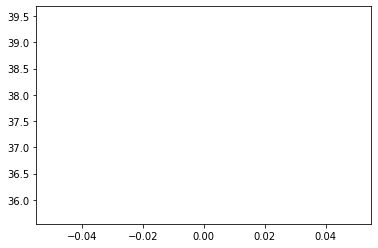

In [96]:
plt.plot(acc1)